# Constant Proportion Portfolio Insurance
Portfolio risk management using diligent asset allocation strategy to limit downside risk   
*by Chee-Foong on 24 Nov 2020*  

---

## Summary
The constant proportion portfolio insurance is an asset allocation strategy between a risky asset and a safe asset.  The portfolio is rebalanced at regular periods (eg: monthly) with a primary objective of protecting downside risk, minimising the amount of maximum drawdown the portfolio is exposed to.

This analysis compares the portfolio performance between a portfolio having 100% exposure to a risk asset and a portfolio with a CPPI allocation strategy.

## CPPI Strategy
1. Let TA be the total asset for investment at the beginning of the strategy
2. Let PV be the portfolio value at any point in time of the investment period
3. Set a floor F (in percentage terms) how much of TA to protect
4. Cushion C will be the maximum amount of money you are willing to lose (C = PV - F x TA)
5. Depending on your risk appetite, set a multipler M to determine the amount of money to invest in risky asset RA
6. Amount to invest in RA = M x C
7. Amount to invest in safe asset SA = PV - RA
8. Repeat the strategy every month by taking reference how much PV is left in your investment

## Example
At the beginning of strategy
- TA = 100000
- F = 80%
- C = 100000 - (100000 x 0.8) = 20000
- M = 4
- PV = 100000  

Allocation:  
RA = 4 x 20000 = 80000  
SA = 20000  

### Scenario 1 - When portfolio value drops but cushion is still positive, allocation to safe assets increases significantly
When portfolio value now is 90000
- PV = 90000
- C = 90000 - (100000 x 0.8) = 10000

Allocation:  
RA = 4 x 10000 = 40000  
SA = 90000 - 40000 = 50000  


### Scenario 2 - When portfolio value drops to the floor value, cushion is 0 and all investments are into safe assets
When portfolio value now is 80000
- PV = 80000
- C = 80000 - (100000 x 0.8) = 0

Allocation:  
RA = 4 x 0 = 0  
SA = 80000 - 0 = 80000  


### Scenario 3 - When portfolio value increases above the initial TA, cushion increases and amount to invest in risky asset exceeds portfolio value
When portfolio value now is 120000
- PV = 120000
- C = 120000 - (100000 x 0.8) = 40000

Allocation (Assuming leverage is not allowed):  
RA = 4 x 40000 = 160000 but cannot invest more than PV, so RA = 120000  
SA = 120000 - 120000 = 0  


## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=Warning)

import sys  
sys.path.append('../src') 
from edge_risk_kit import *

import edge_risk_kit as erk

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

DATA_FOLDER = '../data/'

## Risky Asset

- Download S&P 500 prices which will be used as a risky asset

In [3]:
tickers = ['^GSPC']

start_date = '1900-01-01'
end_date = '2020-12-31'

In [4]:
import yfinance as yf

tickerlist = {}
for ticker in tickers:
    tickerlist[ticker] = yf.Ticker(ticker).info['shortName']
    
data = yf.download(tickers, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [5]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...
2020-11-17,3610.310059,3623.110107,3588.679932,3609.530029,3609.530029,4799570000
2020-11-18,3612.090088,3619.090088,3567.330078,3567.790039,3567.790039,5274450000
2020-11-19,3559.409912,3585.219971,3543.840088,3581.870117,3581.870117,4347200000


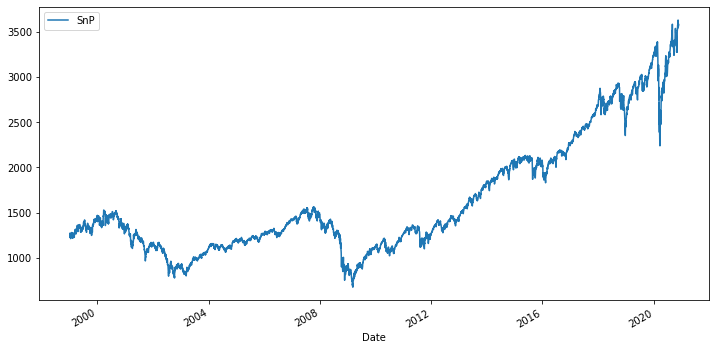

In [6]:
prices = data[['Adj Close']].dropna()
prices.columns = ['SnP']
prices['1999':].plot(figsize=(12,6))
plt.show()

Since we are rebalancing every month, we are only interested in the month returns of the risk asset.

In [7]:
px_monthly = prices.resample('M').fillna('ffill')
px_monthly.index = px_monthly.index.to_period('M')
rets_monthly = px_monthly.pct_change().dropna()
risky_r = rets_monthly

## Performance and Risk Statistics of Portfolio Returns
- Investment period from 1999 to 2020
- Comparing performance of risky asset only portfolio and CPPI strategy portfolio
- Assuming safe asset investment like bank deposits of 1% annualised return, multiplier of 2 and a floor set at 80%
- The plots show the portfolio value of both risky asset portfolio (black-dotted) and CPPI strategy portfolio in blue
- Notice that the volatility, VaR and maximum drawdown measures are reduced significantly without sacrificing too much reduction in Sharpe Ratio

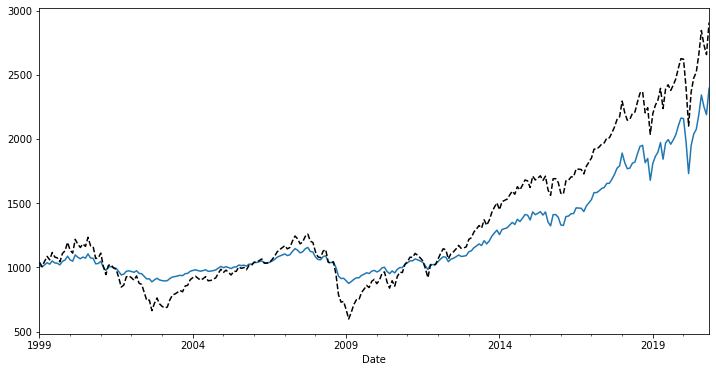

In [8]:
btr = erk.run_cppi(risky_r['1999':], riskfree_rate=0.01, m=2, floor=0.8)
ax = btr['Wealth'].plot(figsize=(12,6), legend=False)
btr['Risky Wealth'].plot(ax=ax, style='k--', legend=False)
plt.show()

### Risky Asset Portfolio

In [9]:
erk.summary_stats(btr['Risky Wealth'].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
SnP,0.048215,0.150663,-0.513875,4.00376,0.071762,0.097704,0.117478,-0.525559


### CPPI Strategy Portfolio

In [10]:
erk.summary_stats(btr['Wealth'].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
SnP,0.040057,0.091919,-0.265548,7.665066,0.039403,0.060735,0.106377,-0.242517


## Concluding Thoughts

- Gap risk is the risk of breaching the floor because of discrete trading in CPPI strategy.  Gap risk will materialize when the portfolio is not rebalanced frequently enough.  Portfolio value may drop below floor value during the month before there is opportunity to rebalance.
- As such, calibrating the multiplier is important.  Multiplier should be calibrated as a function of the maximum potential loss within a given trading interval.